In [1]:
#This will be an analysis of video game sales that I got from a kaggle dataset
%matplotlib inline

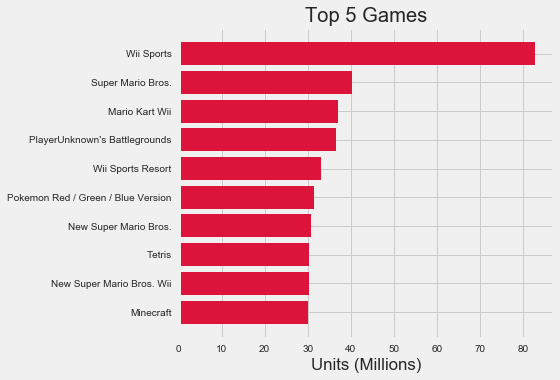

In [156]:
#The first one will be a bar graph featuring the top 10 sold games and comparing their sales

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('short.csv')
#print(list(df)) I like this way of getting the headers so I know what data I'm looking at

name = [item for item in df['Name']] #Turn the item into a list to make it easier to work with 
global_sales = [item for item in df['Total_Shipped']] #I'll use the total shipped as a good proxy for sales

name = name[0:10] #I only care about the top 10
global_sales = global_sales[0:10]

name.reverse() #Reverse the order of the lists to get the top first
global_sales.reverse()

plt.style.use('fivethirtyeight')
plt.barh(name, global_sales,color='crimson')
plt.title('Top 5 Games')
plt.xlabel('Units (Millions)')
plt.tight_layout()

plt.show()

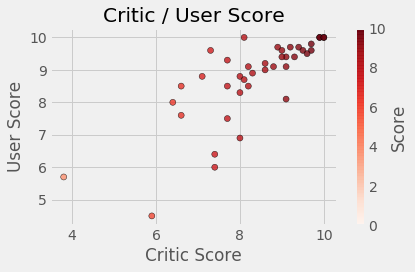

In [4]:
"""""Now lets create a scatter plot to analyze what the critic score of Nintendo Published games typically are
We first have to get the data only for nintendo and then we can begin to plot them all as a scatter. There should
be a color map with a darker shade related to a higher score. We can also check to see if user score 
is correlated with critic score"""

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('short.csv')
#Lets drop all the columns I don't want
dropped = ['Rank', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Total_Shipped', 'Global_Sales', 
           'NA_Sales','PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']

df = df.drop(df[dropped],axis=1) #Drops all the columns based on the list I created
df = df.drop(df[df.Publisher != 'Nintendo' ].index) #Now let's drop everything that isn't published by nintendo
df = df.dropna() #Drop all the NA values since we can't use that

critic_score = df['Critic_Score']
user_score = df['User_Score']

plt.scatter(critic_score,user_score,edgecolor = 'black',alpha = 0.8, c = critic_score,cmap = "Reds")
#You need to define c as a variable to base the scaling on then cmap will work
cbar = plt.colorbar()

cbar.set_label('Score') #sets the colorbar if we want to 
plt.clim(0,10) #Sets the colorbar range

plt.style.use('fivethirtyeight')
plt.title('Critic / User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.tight_layout()
plt.show()

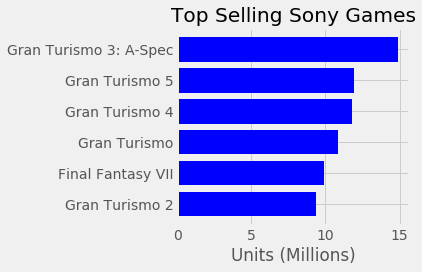

In [5]:
#I'm curious to see what's the top 10 selling games published by Sony so let's look at that

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('short.csv')
#Now let's drop everything that isn't published by sony
df = df.drop(df[df.Publisher != 'Sony Computer Entertainment' ].index)

sales = [item for item in df['Total_Shipped']]
name = [item for item in df['Name']]

sales = sales[0:9]
name = name[0:9]

sales.reverse()
name.reverse()

plt.barh(name,sales,color='blue')
plt.style.use('fivethirtyeight')
plt.title('Top Selling Sony Games')
plt.xlabel('Units (Millions)')
plt.tight_layout()
plt.show()

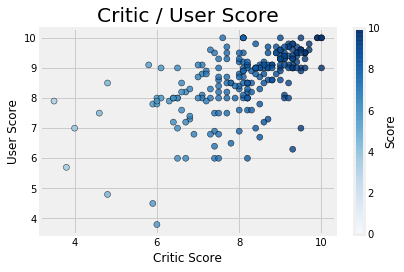

In [2]:
""""Let's revisit my scatter plot and instead of just using Nintendo we'll use any publisher that way we can 
confirm my original idea that critic_reviews are positively correlated with user_scores"""

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('short.csv')
#Lets drop all the columns I don't want
dropped = ['Rank', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Total_Shipped', 'Global_Sales', 
           'NA_Sales','PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']

df = df.drop(df[dropped],axis=1) #Drops all the columns based on the list I created
df = df.dropna() #Drop all the NA values since we can't use that

critic_score = df['Critic_Score']
user_score = df['User_Score']

plt.scatter(critic_score,user_score,edgecolor = 'black',alpha = 0.8, c = critic_score,cmap = "Blues")
#You need to define c as a variable to base the scaling on then cmap will work
cbar = plt.colorbar()

cbar.set_label('Score') #sets the colorbar if we want to 
plt.clim(0,10) #Sets the colorbar range

plt.style.use('fivethirtyeight')
plt.title('Critic / User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.tight_layout()
plt.show()

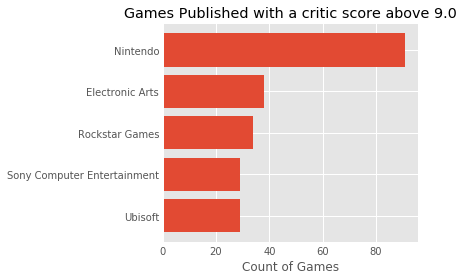

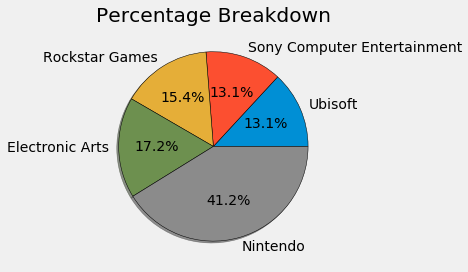

In [8]:
"""" Let's filter out any game that has a lower score than 8 (critic) and see who typically publishes games that
are above an 8. We can see who typically the critics love"""

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

df = pd.read_csv('short.csv')
df = df.drop(df[df.Critic_Score < 9 ].index) #Drop anything that has a critic score of 8 or less
df = df[df['Critic_Score'].notna()] #Keep anything that doesn't contain NaN in the critic score column

critic = df['Critic_Score']
publisher = [item for item in df['Publisher']] #turn this into a list to work with

counter = Counter()

for item in publisher: #count the number of items that appear in my list of items
    counter.update(item.split(',')) 

popular = []
names = []

#most common is a method in counter that takes the top whatever you desire
for item in counter.most_common(5):
    names.append(item[0])
    popular.append(item[1])

popular.reverse()
names.reverse()

plt.style.use('ggplot')
plt.barh(names,popular)
plt.title('Games Published with a critic score above 9.0')
plt.xlabel('Count of Games')
plt.tight_layout()
plt.show()

#Let's plot a pie chart to see the percentage of the top 5 companies

plt.style.use('fivethirtyeight')
plt.title('Percentage Breakdown')
plt.pie(popular,labels = names,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')
plt.tight_layout()
plt.show()

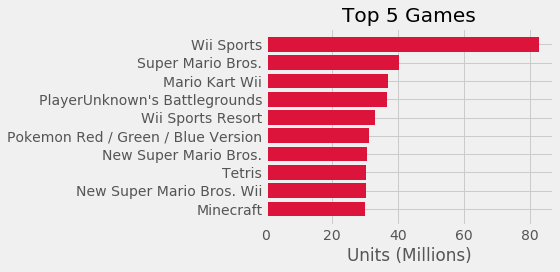

In [27]:
#I'm going to begin reformatting all my plots I did above using the subplots() method instead as it's better

#The first one will be a bar graph featuring the top 10 sold games and comparing their sales

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('fivethirtyeight')

df = pd.read_csv('short.csv')
#print(list(df)) I like this way of getting the headers so I know what data I'm looking at

name = [item for item in df['Name']] #Turn the item into a list to make it easier to work with 
global_sales = [item for item in df['Total_Shipped']] #I'll use the total shipped as a good proxy for sales

name = name[0:10] #I only care about the top 10
global_sales = global_sales[0:10]

name.reverse() #Reverse the order of the lists to get the top first
global_sales.reverse()

fig, ax = plt.subplots(figsize = (8,4))
ax.barh(name, global_sales,color='crimson')
ax.set_title('Top 5 Games')
ax.set_xlabel('Units (Millions)')

plt.tight_layout()
plt.show()

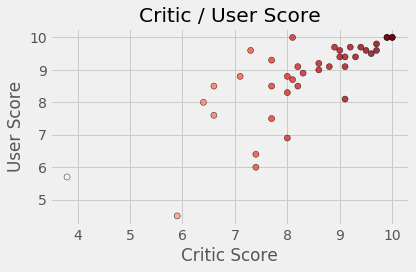

In [28]:
"""""Now lets create a scatter plot to analyze what the critic score of Nintendo Published games typically are
We first have to get the data only for nintendo and then we can begin to plot them all as a scatter. There should
be a color map with a darker shade related to a higher score. We can also check to see if user score 
is correlated with critic score"""

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

df = pd.read_csv('short.csv')
#Lets drop all the columns I don't want
dropped = ['Rank', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Total_Shipped', 'Global_Sales', 
           'NA_Sales','PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']

df = df.drop(df[dropped],axis=1) #Drops all the columns based on the list I created
df = df.drop(df[df.Publisher != 'Nintendo' ].index) #Now let's drop everything that isn't published by nintendo
df = df.dropna() #Drop all the NA values since we can't use that

critic_score = df['Critic_Score']
user_score = df['User_Score']

fig, ax = plt.subplots()

ax.scatter(critic_score,user_score,edgecolor = 'black',alpha = 0.8, c = critic_score,cmap = "Reds")
#You need to define c as a variable to base the scaling on then cmap will work

ax.set_title('Critic / User Score')
ax.set_xlabel('Critic Score')
ax.set_ylabel('User Score')

plt.tight_layout()
plt.show()

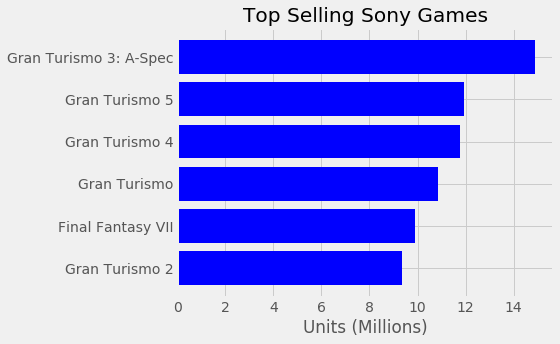

In [33]:
#I'm curious to see what's the top 10 selling games published by Sony so let's look at that

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

df = pd.read_csv('short.csv')
#Now let's drop everything that isn't published by sony
df = df.drop(df[df.Publisher != 'Sony Computer Entertainment' ].index)

sales = [item for item in df['Total_Shipped']]
name = [item for item in df['Name']]

sales = sales[0:9]
name = name[0:9]

sales.reverse()
name.reverse()

fig, ax = plt.subplots(figsize = (8,5))

ax.barh(name,sales,color='blue')
ax.set_title('Top Selling Sony Games')
ax.set_xlabel('Units (Millions)')
plt.tight_layout()
plt.show()

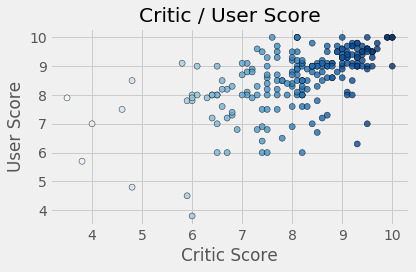

In [37]:
""""Let's revisit my scatter plot and instead of just using Nintendo we'll use any publisher that way we can 
confirm my original idea that critic_reviews are positively correlated with user_scores"""

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

df = pd.read_csv('short.csv')
#Lets drop all the columns I don't want
dropped = ['Rank', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Total_Shipped', 'Global_Sales', 
           'NA_Sales','PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']

df = df.drop(df[dropped],axis=1) #Drops all the columns based on the list I created
df = df.dropna() #Drop all the NA values since we can't use that

critic_score = df['Critic_Score']
user_score = df['User_Score']

fig, ax = plt.subplots()

ax.scatter(critic_score,user_score,edgecolor = 'black',alpha = 0.8, c = critic_score,cmap = "Blues")
#You need to define c as a variable to base the scaling on then cmap will work

ax.set_title('Critic / User Score')
ax.set_xlabel('Critic Score')
ax.set_ylabel('User Score')

plt.tight_layout()
plt.show()

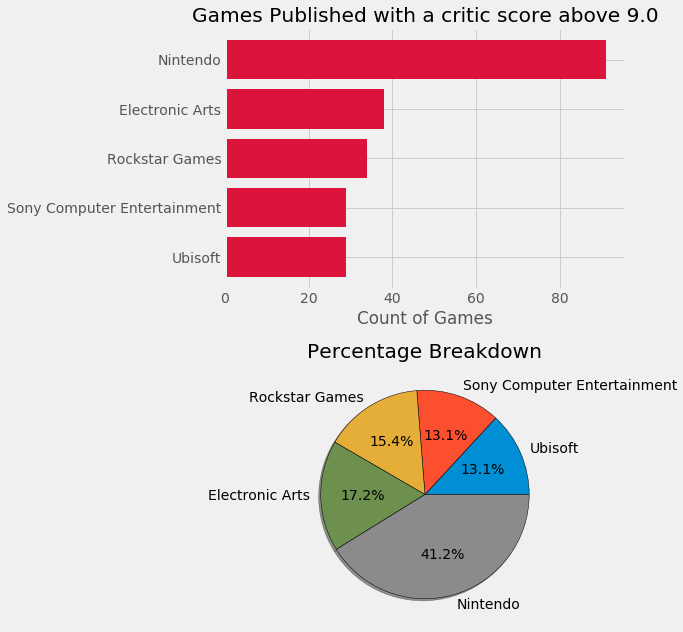

In [44]:
"""" Let's filter out any game that has a lower score than 8 (critic) and see who typically publishes games that
are above an 8. We can see who typically the critics love"""

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

plt.style.use('fivethirtyeight')

df = pd.read_csv('short.csv')
df = df.drop(df[df.Critic_Score < 9 ].index) #Drop anything that has a critic score of 8 or less
df = df[df['Critic_Score'].notna()] #Keep anything that doesn't contain NaN in the critic score column

critic = df['Critic_Score']
publisher = [item for item in df['Publisher']] #turn this into a list to work with

counter = Counter()

for item in publisher: #count the number of items that appear in my list of items
    counter.update(item.split(',')) 

popular = []
names = []

#most common is a method in counter that takes the top whatever you desire
for item in counter.most_common(5):
    names.append(item[0])
    popular.append(item[1])

popular.reverse()
names.reverse()

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1,figsize = (9,9))

ax1.barh(names,popular,color ='crimson')
ax1.set_title('Games Published with a critic score above 9.0')
ax1.set_xlabel('Count of Games')

#Let's plot a pie chart to see the percentage of the top 5 companies

ax2.set_title('Percentage Breakdown')
ax2.pie(popular,labels = names,shadow = True,wedgeprops = {'edgecolor':'black'}, autopct = '%1.1f%%')

plt.tight_layout()
plt.show()